#MNIST ファッション服データセットの画像認識プログラム

Label Description 


1.   0 T-shirt/top
2.   1 Trouser
3.  2 Pullover 
4.  3 Dress
5. 4 Coat 
6. 5 Sandal  
7.  6 Shirt
8.  7 Sneaker  
9.  8 Bag 
10.  9 Ankle boot




#CNN model: 

In [0]:
# tensorflowモジュールのインポート
import tensorflow as tf

In [2]:
#tensofrflowのバージョン
tf.VERSION

'1.13.1'

In [3]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


In [4]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [0]:
#描画ライブラリモジュールをインポートする
import matplotlib.pyplot as plt

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


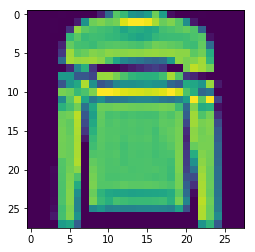

In [7]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

y = 9 Ankle boot


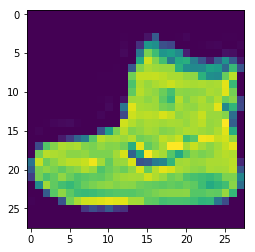

In [8]:
img_index = 0
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

y = 9 Ankle boot


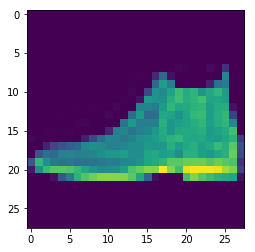

In [9]:
label_index = y_test[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_test[img_index])

In [0]:
type(x_train)
x_train[0]

In [0]:
type(y_train)
y_train[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

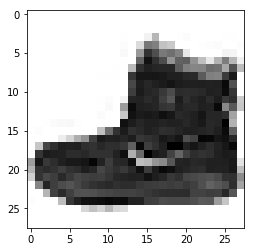

In [0]:
#入力画像x_train[0]を表示する
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [0]:
#入力画像x_train[0]を表示する
for i in range(1,10):
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.show()

In [0]:
# tensorflow.keras.utilsを使って行列を正規化する(すべての値を[0,1]間になる)
# Normalize the data between [0,1]
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

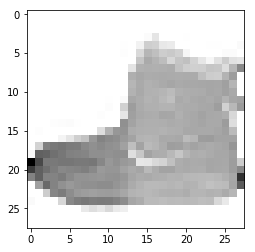

In [0]:
#正規化された画像を表示する
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [11]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [12]:
# 
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)  

In [0]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [0]:
#from tensorflow import keras


In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.6534 - acc: 0.7532
Epoch 00001: val_loss improved from inf to 0.40064, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 87s 2ms/sample - loss: 0.6533 - acc: 0.7533 - val_loss: 0.4006 - val_acc: 0.8596
Epoch 2/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.4436 - acc: 0.8363
Epoch 00002: val_loss improved from 0.40064 to 0.33809, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 84s 2ms/sample - loss: 0.4438 - acc: 0.8362 - val_loss: 0.3381 - val_acc: 0.8766
Epoch 3/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.3977 - acc: 0.8544
Epoch 00003: val_loss improved from 0.33809 to 0.31350, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 82s 1ms/sample - loss: 0.3979 - acc: 0.8543 - val_loss: 0.3135 - val_acc: 0.889

In [0]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [19]:
# 損失率と精度の値を出力する
val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 3s 289us/sample - loss: 0.2696 - acc: 0.8988
0.26956461935043335 0.8988


In [0]:
# テストデータの画像を予測する predictionsという配列に格納する
# Predict
predictions = model.predict([x_test])

In [21]:
# 確立の最大値argmaxによる予測値を表示する
import numpy as np

print(np.argmax(predictions[0]))

9


In [0]:
# x_test[0]の画像を表示する
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

In [23]:
#y_test[0]の値を出力する
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


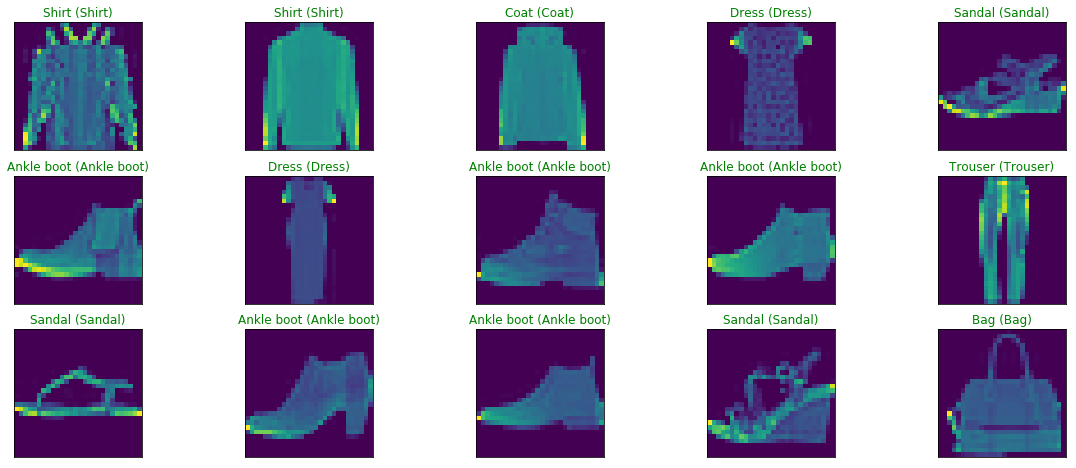

In [24]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))